In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [6]:
df=pd.read_excel("data/sentiment.xlsx")

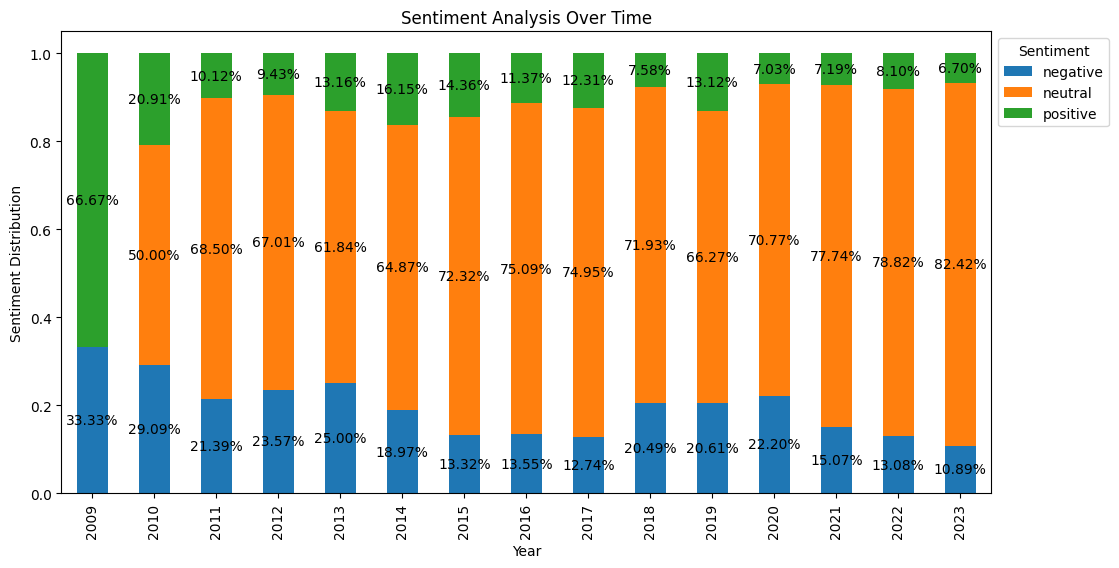

In [9]:
# Convert the "date" column to datetime if it's not already
df['date'] = pd.to_datetime(df['date'])

# Group the data by year and sentiment and calculate the counts
grouped = df.groupby([df['date'].dt.year, 'sentiment'])['sentiment'].count().unstack(fill_value=0)

# Create a 100% stacked bar chart
ax = grouped.div(grouped.sum(1), axis=0).plot(kind='bar', stacked=True, figsize=(12, 6))

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Sentiment Distribution')
plt.title('Sentiment Analysis Over Time')

# Show the percentage labels on each bar (only for values > 0%)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = height * 100
    if percentage > 0:
        ax.annotate(f'{percentage:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center')

# Define custom legend labels and handles
legend_labels = ['negative', 'neutral', 'positive']

# Add the custom legend
ax.legend(legend_labels, title='Sentiment', loc='upper left', bbox_to_anchor=(1, 1))


# Show the plot
plt.show()